In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, accumulate
import copy
import time
import unittest
import networkx as nx


# STUDENT ID NUMBER: 

# INSTRUCTIONS

1. Put your student ID number (no other identifying features).  
If collaborating, put collaborators' id numbers underneath (again, no identifying features).
1. Submit both a notebook and exported PDF of the notebook after restart-and-run-all.  
    1. Submitted notebook must run in reasonable time.
    1. Ensure the exported pdf is LaTex formatted. 
1. No formal written section, but if your algorithm has an explicit recurrence relation, justify its usage in a separate typeset pdf.
1. For the coding section:
    1. Limit code answers to the designated spaces in functions (marked off by "###") and cells (marked by "### DO: *\<instructions\>*").  
       You may add extra cells to run subroutines (in order), but only marked cells will be graded. 
    1. Do not change the provided cells, or their order.  
       Any detected alterations will zero out that section. 
       
### Tips
- You are encouraged to work either alone or with your official partner, but not more.  
- For the coding section, test and sanity-check your work extensively.  
- For written questions on the coding exercises, if you really understand the solution, the answer should fit in 1-3 sentences.  

# Coding [$4 \times 25 = 100$ pts]

## Ex. 1 - Linear Partition

See Section 8.5 of Skiena


In [158]:
### DO: Make a function that takes in nonnegative array A, and integer k. 
### Return the partition into k or fewer ranges to minimize the maximum sum over all ranges without reordering.  

def partition_function(a, k): 
    l = max(a) 
    r = sum(a) + 1 

    def grouping(max_sum): 
        sum_of_group = 0 
        num_group = 1 

        for i in a: 
            if sum_of_group + i <= max_sum:
                sum_of_group += i
            else:
                sum_of_group = i 
                num_group += 1 
        return num_group

    while l < r: 
        mid = (l + r) // 2 
        if grouping(mid) > k:
            l = mid + 1 
        else: 
            r = mid  

    partitions = []
    current = []
    total = 0
    remaining_parts = k

    for i in reversed(a):  
        if total + i > l or len(a) - len(partitions) < remaining_parts:
            partitions.append(current[::-1])
            current = [i]
            total = i
            remaining_parts -= 1
        else:
            current.append(i)
            total += i
    partitions.append(current[::-1]) 
    partitions = partitions[::-1] 

    return partitions
        
EX1_TEST_1 = [1,2,3,4,5,6,7,8,9]
print(f"TEST ARRAY 1: {EX1_TEST_1}")
parititoned_list = partition_function(EX1_TEST_1,2)

for partition in parititoned_list:
    print(f"{partition} SUM:{sum(partition)}")

print()

EX1_TEST_2 = [1,9,2,8,3,7,4,6]
print(f"TEST ARRAY 2: {EX1_TEST_2}")
parititoned_list = partition_function(EX1_TEST_2,2)

for partition in parititoned_list:
    print(f"{partition} SUM:{sum(partition)}")


TEST ARRAY 1: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6] SUM:21
[7, 8, 9] SUM:24

TEST ARRAY 2: [1, 9, 2, 8, 3, 7, 4, 6]
[1, 9, 2, 8] SUM:20
[3, 7, 4, 6] SUM:20


In [159]:
### DO: Prove your code works.
EX1_Tests = 20
k = 3

for i in range(5, EX1_Tests+1):
    EX1_ARRAY_TEST = np.random.randint(1,51, size=i)
    EX1_ARRAY_TEST = EX1_ARRAY_TEST.tolist()

    print(f"TEST CASE ARRAY SIZE: {i}")
    print(EX1_ARRAY_TEST)
    EX1_TEST_PARITIONED = partition_function(EX1_ARRAY_TEST, k)

    for partition in EX1_TEST_PARITIONED:
        print(f"{partition} SUM:{sum(partition)}")
    print()

TEST CASE ARRAY SIZE: 5
[33, 22, 33, 48, 25]
[33] SUM:33
[22, 33] SUM:55
[48, 25] SUM:73

TEST CASE ARRAY SIZE: 6
[39, 25, 23, 32, 29, 24]
[39, 25] SUM:64
[23, 32] SUM:55
[29, 24] SUM:53

TEST CASE ARRAY SIZE: 7
[46, 42, 30, 38, 42, 38, 23]
[46, 42] SUM:88
[30, 38] SUM:68
[42, 38, 23] SUM:103

TEST CASE ARRAY SIZE: 8
[36, 33, 13, 6, 7, 29, 41, 30]
[36, 33] SUM:69
[13, 6, 7, 29] SUM:55
[41, 30] SUM:71

TEST CASE ARRAY SIZE: 9
[12, 9, 6, 30, 14, 50, 13, 44, 26]
[12, 9, 6, 30, 14] SUM:71
[50, 13] SUM:63
[44, 26] SUM:70

TEST CASE ARRAY SIZE: 10
[10, 38, 50, 22, 46, 14, 4, 35, 20, 46]
[10, 38, 50] SUM:98
[22, 46, 14, 4] SUM:86
[35, 20, 46] SUM:101

TEST CASE ARRAY SIZE: 11
[5, 20, 10, 22, 2, 10, 49, 9, 29, 6, 17]
[5, 20, 10, 22] SUM:57
[2, 10, 49] SUM:61
[9, 29, 6, 17] SUM:61

TEST CASE ARRAY SIZE: 12
[45, 34, 47, 8, 10, 39, 42, 30, 8, 16, 16, 45]
[45, 34, 47] SUM:126
[8, 10, 39, 42] SUM:99
[30, 8, 16, 16, 45] SUM:115

TEST CASE ARRAY SIZE: 13
[13, 27, 2, 30, 18, 9, 42, 15, 28, 18, 19, 3, 

## Ex. 2 - Max Sum Path

Source: [Project Euler](https://projecteuler.net/problem=18)

Play the following game: 

Make a Pascal triangle of height $N$, where the entries are random integers between 0 and 100.  
Starting from the top, make a path by choosing any adjacent elements in the row below.  
Do this until you reach the bottom, and add them up - this makes the *path sum*. 

Find the maximum path sum for a given triangle by dynamic programming. 

In [17]:
### DO: Generate a Pascal triangle arrangement of height N, but filled with random integers between 0 and 100. 

N = 5
def make_triangle(height):
    triangle = []
    for i in range(height):
        zeros = height-i 
        array = np.random.randint(0,101, size=i+1)
        while zeros > 1:
            array = np.append(array, 0)
            zeros-=1
        current_list = array.tolist()
        triangle.append(current_list)
    return triangle

test_triangle = make_triangle(N)
for row in test_triangle:
    print(row)


[55, 0, 0, 0, 0]
[77, 88, 0, 0, 0]
[58, 23, 53, 0, 0]
[69, 30, 80, 62, 0]
[37, 22, 6, 55, 47]


In [18]:
#Brute Force Solution:
#Get all possible Paths and Calculate

def get_paths(N):
    #Get All paths downward the triangle
    path = product([0,1], repeat=N-1)
    for i in path:
        path_list = enumerate([0,*accumulate(i)])
        yield list(path_list)
        
def path_sum(tri, path):
    return sum(tri[r][n] for r,n in path)

def brute_force_longest_path(tri):
    height = len(tri)
    return max(path_sum(tri,p) for p in get_paths(height))

print(f"The Max Sum is: {brute_force_longest_path(test_triangle)}")


The Max Sum is: 331


In [19]:
### DO: Find the max sum path for a triangle

#Dyncamic Programming Approach
test_triangle_sub = make_triangle(N)

def max_path_sum(tri, m, n):
    
    temporary_triangle = copy.deepcopy(tri)

    for i in range(m-1, -1, -1):
        for j in range(i+1):

            # for each element, check elements underneath and to the right and find the maximum
            if (temporary_triangle[i+1][j] > temporary_triangle[i+1][j+1]):
                temporary_triangle[i][j] += temporary_triangle[i+1][j]
            else:
                temporary_triangle[i][j] += temporary_triangle[i+1][j+1]

    # return the top element which has the maximum sum
    return temporary_triangle[0][0]

print(f"The Max Sum is: {max_path_sum(test_triangle, N-1, N-1)}")

The Max Sum is: 331


In [20]:
# CROSS TEST BRUTE FORCE AND DYNAMIC PROGRAMMING

test_cases = 20
print('   N | Brute Force | Dynamic Programming')
for i in range(1,test_cases+1):
    curret_test = make_triangle(i)
    Brute_Force_Result = brute_force_longest_path(curret_test)
    Dyanmic_Programming_Result = max_path_sum(curret_test, i-1, i-1)

    print(str(i).rjust(4), '|', str(Brute_Force_Result).rjust(11) ,'|', str(Dyanmic_Programming_Result).rjust(19))



   N | Brute Force | Dynamic Programming
   1 |          55 |                  55
   2 |         124 |                 124
   3 |         202 |                 202
   4 |         224 |                 224
   5 |         370 |                 370
   6 |         415 |                 415
   7 |         365 |                 365
   8 |         550 |                 550
   9 |         674 |                 674
  10 |         758 |                 758
  11 |         745 |                 745
  12 |         831 |                 831
  13 |         856 |                 856
  14 |         972 |                 972
  15 |        1043 |                1043
  16 |        1212 |                1212
  17 |        1258 |                1258
  18 |        1264 |                1264
  19 |        1360 |                1360
  20 |        1409 |                1409


In [22]:
### DO: Prove it works to at least N = 100

N_100 = 100
print('   N |    Time   | Function')
for i in range(1,N_100+1):
    start = time.time()
    temp = make_triangle(i)
    curret_test_value = max_path_sum(temp, i-1, i-1)
    end = time.time()
    print(str(i).rjust(4), '|', str(np.round(end - start, 6)).rjust(9), '|', str(curret_test_value))

   N |    Time   | Function
   1 |   0.00176 | 80
   2 |       0.0 | 143
   3 |       0.0 | 218
   4 |       0.0 | 232
   5 |       0.0 | 404
   6 |       0.0 | 451
   7 |       0.0 | 548
   8 |       0.0 | 537
   9 |  0.000327 | 594
  10 |       0.0 | 756
  11 |       0.0 | 870
  12 |  0.000831 | 717
  13 |       0.0 | 990
  14 |       0.0 | 887
  15 |       0.0 | 1073
  16 |  0.003854 | 1028
  17 |       0.0 | 1121
  18 |       0.0 | 1297
  19 |       0.0 | 1387
  20 |  0.002914 | 1552
  21 |       0.0 | 1510
  22 |  0.002663 | 1467
  23 |   0.00146 | 1637
  24 |       0.0 | 1636
  25 |       0.0 | 1928
  26 |  0.005128 | 1923
  27 |  0.002007 | 1917
  28 |  0.002009 | 1989
  29 |  0.002032 | 2075
  30 |  0.002075 | 2168
  31 |   0.00211 | 2287
  32 |   0.00203 | 2334
  33 |  0.003011 | 2355
  34 |  0.002009 | 2406
  35 |  0.004032 | 2416
  36 |  0.002009 | 2744
  37 |  0.004015 | 2723
  38 |  0.004013 | 2851
  39 |  0.004013 | 2782
  40 |  0.003096 | 2877
  41 |  0.004169 | 2834
  4

## Ex. 3 -  Dynamic Programming for Dynamics  

Consider 2 points $(x_1, y_1)$ and $(x_2, y_2)$ where $x_1 < x_2$ and $y_1> y_2$.  
Let a ball of mass $m$ move from the higher point to the lower point under the influence of a gravitational field.  
Find the trajectory that minimizes the travel time by dynamic programming.  



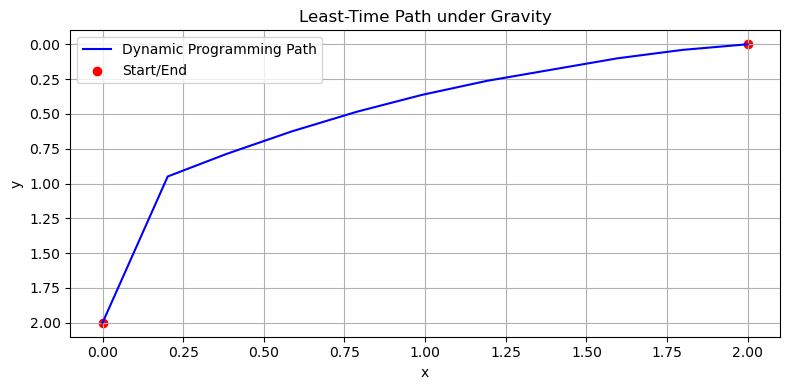

In [5]:
### DO: Find and plot the trajectory described above via dynamic programming. 
### Compare it to the theoretically optimal trajectory.

# Basic setup
g = 9.81  # gravity

# Start and end positions
x_start, y_start = 0.0, 2.0
x_end, y_end = 2.0, 0.0

# How many steps we'll divide the x and y range into
num_cols = 100  # number of x-positions
num_rows = 100  # number of y-values to try at each x
lookback = 10   # how many steps back we look when updating

# Create grid values
x_grid = np.linspace(x_start, x_end, num_cols)
y_grid = np.linspace(y_end, y_start, num_rows)

# Time table: stores the best (fastest) time to reach each (x, y) point
time_table = np.full((num_cols, num_rows), np.inf)
start_row = np.argmin(np.abs(y_grid - y_start))
time_table[0, start_row] = 0  # start time is 0

# Loop through x positions from left to right
for col in range(1, num_cols):
    for row in range(num_rows):
        y_now = y_grid[row]
        if y_now >= y_start:
            continue  # skip points higher than start

        # Try all previous x positions within lookback range
        for prev_col in range(max(0, col - lookback), col):
            dx = x_grid[col] - x_grid[prev_col]
            for prev_row in range(num_rows):
                y_prev = y_grid[prev_row]
                if y_prev < y_now:
                    continue  # skip upward moves

                dy = y_now - y_prev
                dist = np.sqrt(dx**2 + dy**2)

                # Estimate speed from average height drop
                avg_h = (y_start - y_now + y_start - y_prev) / 2
                if avg_h <= 0:
                    continue
                v = np.sqrt(2 * g * avg_h)

                # Time = distance / speed
                time = dist / v
                time_table[col, row] = min(
                    time_table[col, row],
                    time_table[prev_col, prev_row] + time
                )

# Figure out where we ended up (closest y to y_end)
end_row = np.argmin(np.abs(y_grid - y_end))
min_time = time_table[-1, end_row]

# Backtrack to recover the path
path = []
col = num_cols - 1
row = end_row
path.append((x_grid[col], y_grid[row]))

while col > 0:
    best = None
    for prev_col in range(max(0, col - lookback), col):
        dx = x_grid[col] - x_grid[prev_col]
        for prev_row in range(num_rows):
            y_prev = y_grid[prev_row]
            if y_prev < y_grid[row]:
                continue

            dy = y_grid[row] - y_prev
            dist = np.sqrt(dx**2 + dy**2)
            avg_h = (y_start - y_grid[row] + y_start - y_prev) / 2
            if avg_h <= 0:
                continue
            v = np.sqrt(2 * g * avg_h)
            time = dist / v

            if np.isclose(time_table[prev_col, prev_row] + time, time_table[col, row], atol=1e-4):
                if best is None or time_table[prev_col, prev_row] < time_table[best]:
                    best = (prev_col, prev_row)
    if best is None:
        break
    col, row = best
    path.append((x_grid[col], y_grid[row]))

# Flip the path since we built it backwards
path.reverse()

# Plot it
x_path, y_path = zip(*path)

plt.figure(figsize=(8, 4))
plt.plot(x_path, y_path, label="Dynamic Programming Path", color='blue')
plt.scatter([x_start, x_end], [y_start, y_end], color='red', label="Start/End")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least-Time Path under Gravity")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()  # gravity pulls down
plt.tight_layout()
plt.show()
    

## Ex. 4 - Eggplant Edits

The name "eggplant" is apparently from the white color of (some) species of eggplant, at least in American English.  
In other parts of the world, it is known by other (anglicized) names like "aubergine," "brinjal," and "berenjena."   
It is [hypothesized](https://www.youtube.com/watch?v=mQoNAR1um_c) that these names are all related to each other as loanwords, corruptions, or mutations of each other.  

Find a list of at least 10 (anglicized) names for eggplant in other languages.  
Calculate the Levenshtein edit distance between all pairs by dynamic programming.  
Construct the MST and compare this to the historical/geographical relationships between countries. 

In [2]:
### DO: Make a list L of at least 10 anglicized names for egpplant. 

L = ["badenjan", 
     "vangi", 
     "begun", 
     "beringela",
     "brinjal",
     "albergina",
     "melitzana",
     "melongena",
     "patliijan",
     "vatingan"]

In [ ]:
### DO: Make a function to calculate the Levenshtein edit distance and calculate it for all the pairs. 

def lev_rec(s ,t): 
    if len(s) == 0:
        return len(t)
    if len(t) == 0:
        return len(s)
        
    if s[-1] == t[-1]:
        return lev_rec(s[:-1], t[:-1])
    else:
        return 1+min([
                    lev_rec(s[:-1], t), 
                    lev_rec(s, t[:-1]),
                    lev_rec(s[:-1], t[:-1])
                    ])

for name in L:
    current_name_lev_dist = []
    for i in range(10):
        current_name_lev_dist.append(lev_rec(name, L[i]))
    print((name).rjust(10), ":",  str(current_name_lev_dist).rjust(2))

  badenjan : [0, 6, 5, 7, 4, 7, 7, 7, 5, 4]
     vangi : [6, 0, 5, 7, 6, 7, 8, 7, 7, 4]
     begun : [5, 5, 0, 6, 6, 5, 7, 6, 8, 6]
 beringela : [7, 7, 6, 0, 4, 6, 6, 4, 9, 6]
   brinjal : [4, 6, 6, 4, 0, 6, 7, 8, 6, 5]
 albergina : [7, 7, 5, 6, 6, 0, 7, 6, 8, 7]
 melitzana : [7, 8, 7, 6, 7, 7, 0, 4, 6, 6]
 melongena : [7, 7, 6, 4, 8, 6, 4, 0, 8, 6]
 patliijan : [5, 7, 8, 9, 6, 8, 6, 8, 0, 4]
  vatingan : [4, 4, 6, 6, 5, 7, 6, 6, 4, 0]


           badenjan vangi    begun    beringela brinjal  albergina melitzana melongena patliijan vatingan
badenjan  0         6         5         7         4         7         7         7         5         4         
vangi     6         0         5         7         6         7         8         7         7         4         
begun     5         5         0         6         6         5         7         6         8         6         
beringela 7         7         6         0         4         6         6         4         9         6         
brinjal   4         6         6         4         0         6         7         8         6         5         
albergina 7         7         5         6         6         0         7         6         8         7         
melitzana 7         8         7         6         7         7         0         4         6         6         
melongena 7         7         6         4         8         6         4         0         8         6         
patlii

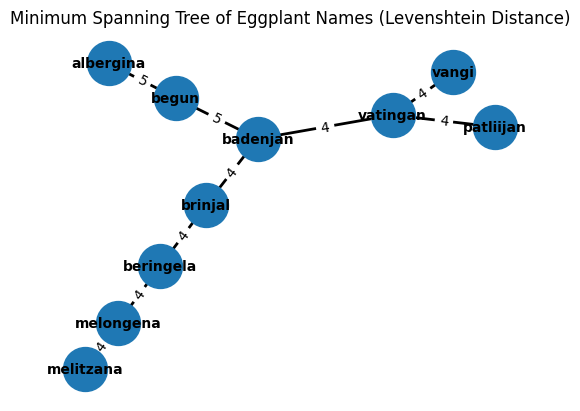

In [61]:
### DO: Create the distance matrix and MST of the edit distances.  
### Compare to the distance matrix and MST of at least the geographical distances of the capitals. 

G = nx.Graph()
for name in L:
    G.add_node(name)

distance_matrix = {} # Optional: to store the matrix for inspection
for i in range(len(L)):
    distance_matrix[L[i]] = {}
    for j in range(i + 1, len(L)): # Iterate through unique pairs
        name1 = L[i]
        name2 = L[j]
        distance = lev_rec(name1, name2)
        G.add_edge(name1, name2, weight=distance)
        distance_matrix[name1][name2] = distance

header = " ".join([f"{name:<8}" for name in L])
print(f"{'':<10} {header}")
for i, name1 in enumerate(L):
    row_str = f"{name1:<10}"
    for j, name2 in enumerate(L):
        if i == j:
            row_str += f"{0:<10}"
        elif j > i:
            row_str += f"{distance_matrix[name1][name2]:<10}"
        else:
            row_str += f"{distance_matrix[name2][name1]:<10}"
    print(row_str)

mst = nx.minimum_spanning_tree(G, weight='weight')

pos = nx.spring_layout(mst, seed=42) # positions for all nodes
nx.draw_networkx_nodes(mst, pos, node_size=1000)
nx.draw_networkx_edges(mst, pos, width=2)
nx.draw_networkx_labels(mst, pos, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title("Minimum Spanning Tree of Eggplant Names (Levenshtein Distance)")
plt.axis('off')
plt.show()


